In [86]:
import timeit
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

In [117]:
def basic(x, y, n):
    if (n == 1):
        return x * y

    m = n / 2
    a = x / pow(2, m)
    b = x % pow(2, m)
    c = y / pow(2, m)
    d = y % pow(2, m)
    e = basic(a, c, m)
    f = basic(b, d, m)
    g = basic(b, c, m)
    h = basic(a, d, m)

    return (pow(2, 2 * m) * e) + (pow(2, m) * (g + h)) + f

def karatsuba(x, y, n):
    if (n == 1):
        return x * y
    
    m = n / 2
    a = x / pow(2, m)
    b = x % pow(2, m)
    c = y / pow(2, m)
    d = y % pow(2, m)
    e = karatsuba(a, c, m)
    f = karatsuba(b, d, m)
    g = karatsuba(abs(a - b), abs(c - d), m)
    
    return (pow(2, 2 * m) * e) + (pow(2, m) * (e + f - g)) + f

In [134]:
tb = []
tk = []
    
for i in range(1, 100):
    x = pow(i, 3)
    y = pow(i, 3)

    rb = Timer(lambda: basic(x, y, 2))
    tb.append(rb.timeit(number=1))

    rk = Timer(lambda: karatsuba(x, y, 2))
    tk.append(rb.timeit(number=1))

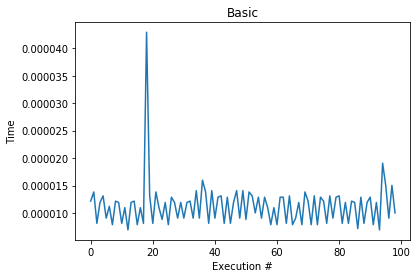

Average (Basic): 1.13164535677e-05


In [135]:
plt.xlabel('Execution #')
plt.ylabel('Time')
plt.title('Basic')
plt.plot(tb)
plt.show()

print("Average (Basic): " + str(np.average(tb)))

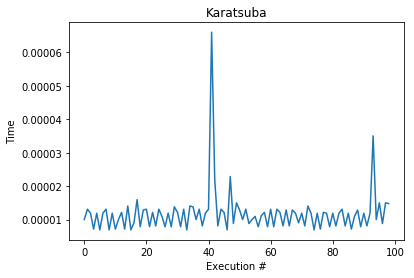

Average (Karatsuba): 1.17860659204e-05


In [136]:
plt.xlabel('Execution #')
plt.ylabel('Time')
plt.title('Karatsuba')
plt.plot(tk)
plt.show()

print("Average (Karatsuba): " + str(np.average(tk)))